<div dir=ltr align=center>In the name of God</div>
<br>
<font size=6><div dir=ltr align=center>
<font size=5>
Intelligent Analysis of
Biomedical Images
<br>
<font size=4>
sharif university of technology, CE department
</font>
<br>
<font size=3>
Prof. Rohban
</font>
<br>
<font size=3>
Designed By: Reza Vahidimajd
</font>
<br>
<br>
<font size=6>
Homework 2
</font><br>
<font size=4>


In [1]:
import numpy as np
import imutils
from skimage.transform import rotate ## Image rotation routine
import scipy.fftpack as fft          ## Fast Fourier Transform
import scipy.misc
from PIL import Image
import matplotlib.pyplot as pyp

In [2]:
def inverse_fft_translate(operator):
    return fft.irfft(operator, axis=1)

In [4]:
ref_image=Image.open('/content/CT-abdomen-400x267.jpg').convert('L')

In [5]:
def radon(image, steps):
    #Build the Radon Transform using 'steps' projections of 'image'.
    projections = []        ## Accumulate projections in a list.
    dTheta = -180.0 / steps ## Angle increment for rotations.

    for i in range(steps):
        projections.append(rotate(image, i*dTheta).sum(axis=0))

    return np.vstack(projections) # Return the projections as a sinogram

In [6]:
sinogram=radon(np.array(ref_image),600)

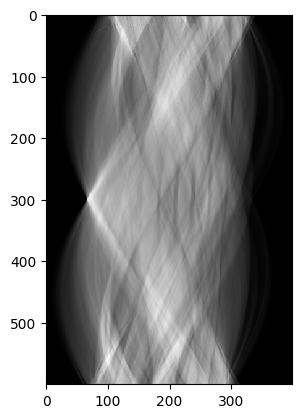

In [7]:
pyp.imshow(sinogram,interpolation='nearest',cmap='gray')

In [8]:
def back_project(operator):
    laminogram = np.zeros((operator.shape[1],operator.shape[1]))
    dTheta = 180.0 / operator.shape[0]
    for i in range(operator.shape[0]):
        temp = np.tile(operator[i],(operator.shape[1],1))
        temp = rotate(temp, dTheta*i)
        laminogram += temp
    return laminogram

In [9]:
unfiltered_reconstruction = back_project(sinogram)

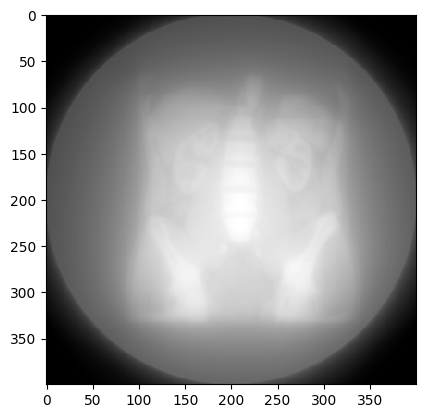

In [10]:
pyp.imshow(unfiltered_reconstruction,interpolation='nearest',cmap='gray')

In [11]:
def fft_translate(projs):
    #Build 1-d FFTs of an array of projections, each projection 1 row of the array.
    return fft.rfft(projs, axis=1)

In [13]:
frequency_domain_sinogram = fft_translate(sinogram)

In [14]:
def ramp_filter(ffts):
    #Ramp filter a 2-d array of 1-d FFTs (1-d FFTs along the rows).
    ramp = np.floor(np.arange(0.5, ffts.shape[1]//2 + 0.1, 0.5))
    return ffts * ramp


In [15]:
filtered_frequency_domain_sinogram = ramp_filter(frequency_domain_sinogram)

In [16]:
filtered_spatial_domain_sinogram = inverse_fft_translate(filtered_frequency_domain_sinogram)

In [17]:
reconstructed_image = back_project(filtered_spatial_domain_sinogram)

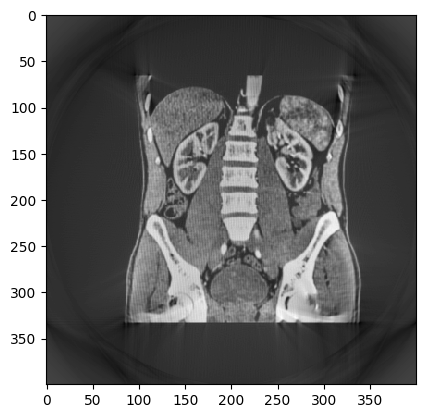

In [18]:
pyp.imshow(reconstructed_image,interpolation='nearest',cmap='gray')